In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen, VerticalPitch
import os

# importing the data parser through mplsoccer
parser  = Sbopen()

In [2]:
competitions = parser.competition()
competitions.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-05-21T03:36:44.090970,2024-05-21T03:38:27.534702,2024-05-21T03:38:27.534702,2024-05-21T03:36:44.090970
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-02-28T18:02:23.493027,None,None,2024-02-28T18:02:23.493027
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-05-13T13:14:25.239651,2021-06-13T16:17:31.694,None,2024-05-13T13:14:25.239651
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882


In [5]:
parser.match(competition_id=16,season_id=1)

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,18245,2018-05-26,2018-05-26 20:45:00,3,1,available,scheduled,2021-01-23 21:55:30.425330,2021-06-13 16:17:31.694,7,...,26,Final,4222,NSK Olimpiyskyi,238,Ukraine,727,Milorad Mažić,203,Serbia


In [6]:
df,df_related,df_freeze,df_tactics=parser.event(18245)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3497 entries, 0 to 3496
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3497 non-null   object 
 1   index                           3497 non-null   int64  
 2   period                          3497 non-null   int64  
 3   timestamp                       3497 non-null   object 
 4   minute                          3497 non-null   int64  
 5   second                          3497 non-null   int64  
 6   possession                      3497 non-null   int64  
 7   duration                        2519 non-null   float64
 8   match_id                        3497 non-null   int64  
 9   type_id                         3497 non-null   int64  
 10  type_name                       3497 non-null   object 
 11  possession_team_id              3497 non-null   int64  
 12  possession_team_name            34

In [10]:
#Removing Throw in from Passes
passes=df.loc[df['type_name']=='Pass'].loc[df['sub_type_name']!='Throw_in'].set_index('id')
passes.head()

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,...,pass_miscommunication,shot_one_on_one,block_offensive,shot_redirect,foul_committed_advantage,foul_won_advantage,pass_goal_assist,foul_committed_card_id,foul_committed_card_name,injury_stoppage_in_chain
id,,,,,,,,,,,,,,,,,,,,,
25be91a5-a084-42cb-8cc1-a0fe7b0f52f9,5,1,00:00:00.371000,0,0,2,1.735914,18245,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b544eb38-7cc9-4cb5-99e9-ebac4fce9eb9,8,1,00:00:03.275000,0,3,2,3.772067,18245,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192c9629-1703-40ab-8498-cab869cf0144,12,1,00:00:08.236000,0,8,3,0.793057,18245,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
599fb72e-8baf-4d5b-815e-7beb8c54e6af,17,1,00:00:10.701000,0,10,3,0.987721,18245,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bea53e5b-5a58-4771-a8a6-8b385a10354a,20,1,00:00:11.728000,0,11,3,0.969765,18245,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Player Names
df['player_name'].value_counts()

player_name
Toni Kroos                             263
Marcelo Vieira da Silva Júnior         256
Luka Modrić                            251
Sergio Ramos García                    237
Francisco Román Alarcón Suárez         190
Raphaël Varane                         176
José Ignacio Fernández Iglesias        145
Cristiano Ronaldo dos Santos Aveiro    143
Karim Benzema                          143
Carlos Henrique Casimiro               142
Georginio Wijnaldum                    141
Andrew Robertson                       140
Roberto Firmino Barbosa de Oliveira    138
Sadio Mané                             134
Jordan Brian Henderson                 130
James Philip Milner                    123
Trent Alexander-Arnold                 116
Dejan Lovren                           105
Daniel Carvajal Ramos                   97
Virgil van Dijk                         84
Keylor Navas Gamboa                     69
Loris Karius                            68
Adam David Lallana                      65

In [12]:
#Type of Events
df['type_name'].value_counts()

type_name
Pass               1033
Ball Receipt        978
Carry               796
Pressure            226
Ball Recovery        95
Duel                 56
Block                36
Clearance            33
Goal Keeper          32
Dribble              29
Shot                 28
Dispossessed         28
Foul Committed       25
Foul Won             23
Dribbled Past        20
Miscontrol           16
Interception         11
Injury Stoppage       9
Substitution          5
Half End              4
Half Start            4
Tactical Shift        3
50/50                 2
Error                 2
Starting XI           2
Offside               1
Name: count, dtype: int64

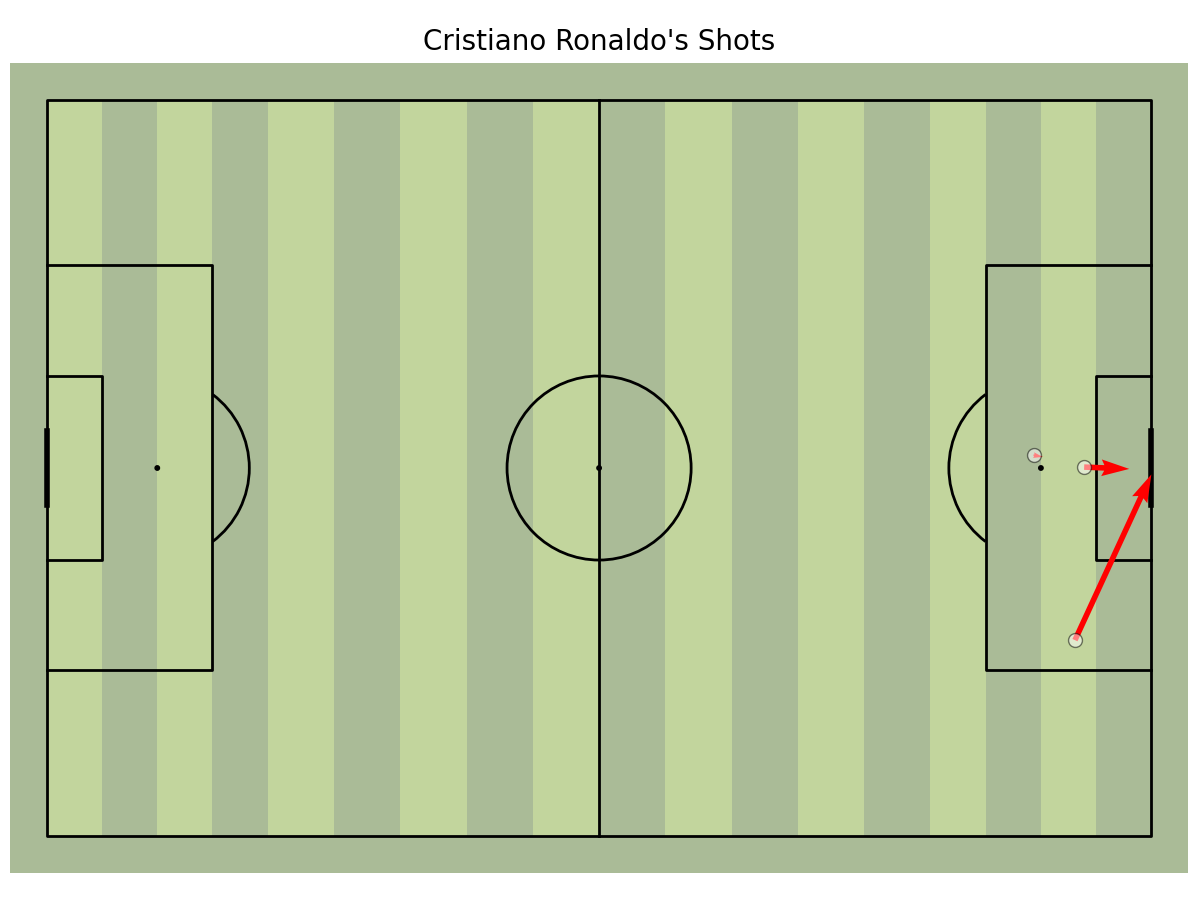

In [17]:
ronaldo_filter = (df['type_name'] == 'Shot') & (df['player_name'] == "Cristiano Ronaldo dos Santos Aveiro")
df_shots = df.loc[ronaldo_filter, ['x', 'y', 'end_x', 'end_y']]

# Create the pitch
pitch = Pitch(line_color='black', pitch_color='#aabb97', stripe_color='#c2d59d', stripe=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Plot arrows for the shots
pitch.arrows(df_shots.x, df_shots.y,
             df_shots.end_x, df_shots.end_y, color="red", ax=ax['pitch'])

# Scatter plot for the shot locations
pitch.scatter(df_shots.x, df_shots.y, alpha=0.5, s=100, color="white", edgecolors="black", ax=ax['pitch'])

# Title for the plot
fig.suptitle("Cristiano Ronaldo's Shots", fontsize=20)

# Show the plot
plt.show()

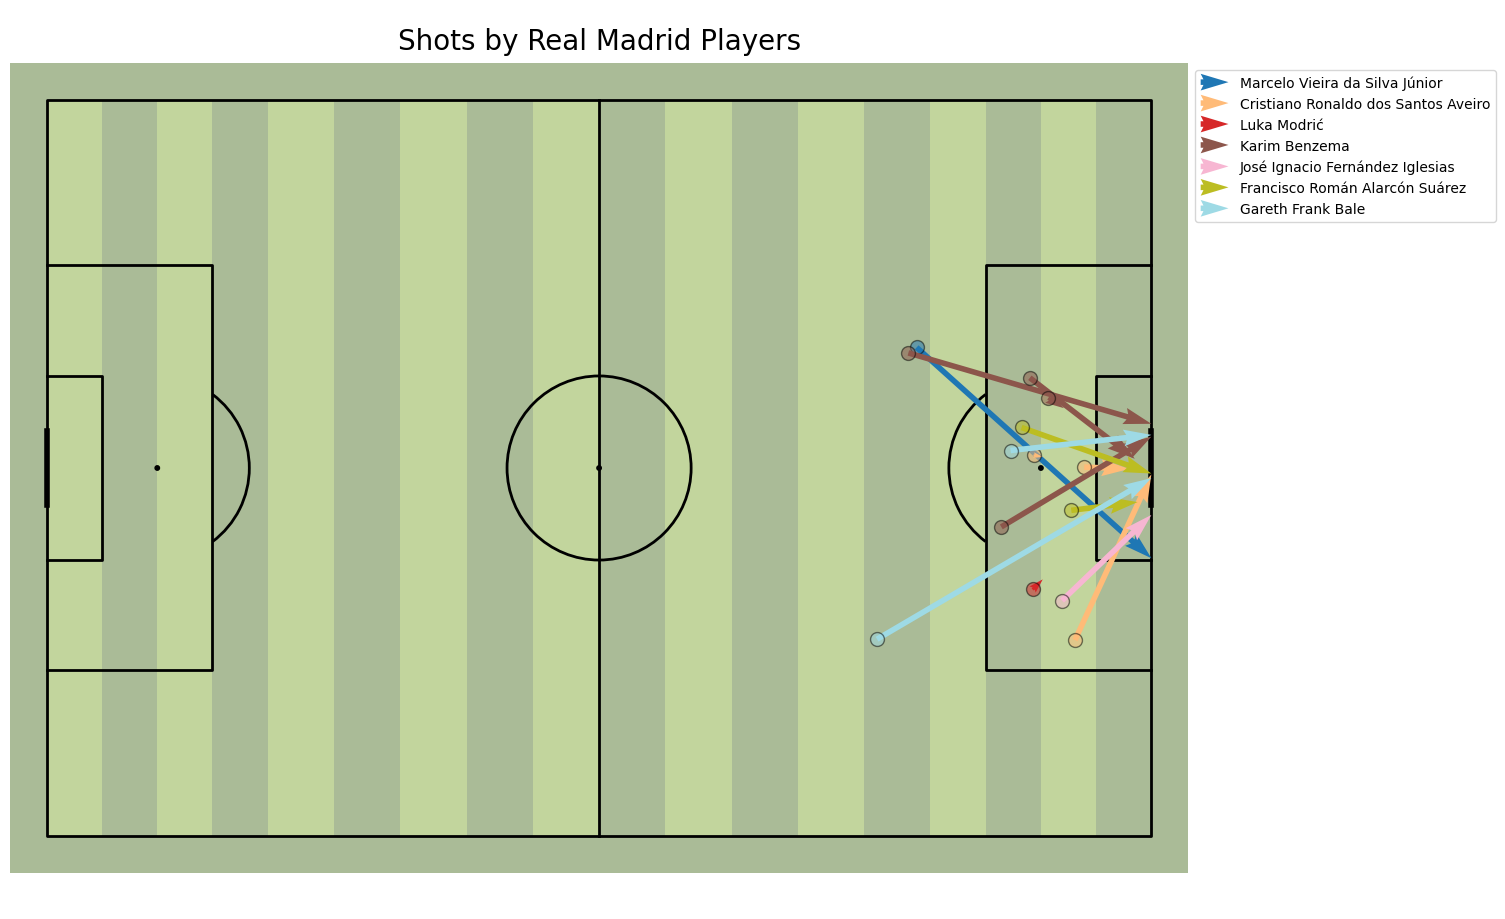

In [20]:
real_madrid_filter = (df['type_name'] == 'Shot') & (df['team_name'] == 'Real Madrid')
df_shots = df.loc[real_madrid_filter, ['player_name', 'x', 'y', 'end_x', 'end_y']]

# Create the pitch
pitch = Pitch(line_color='black', pitch_color='#aabb97', stripe_color='#c2d59d', stripe=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Plot arrows for the shots by different players with different colors
players = df_shots['player_name'].unique()
colors = plt.get_cmap('tab20', len(players))

for i, player in enumerate(players):
    player_shots = df_shots[df_shots['player_name'] == player]
    color = colors(i / len(players))  # Get the color from the colormap
    pitch.arrows(player_shots.x, player_shots.y,
                 player_shots.end_x, player_shots.end_y, color=color, ax=ax['pitch'], label=player)
    pitch.scatter(player_shots.x, player_shots.y, alpha=0.5, s=100, color=color, edgecolors="black", ax=ax['pitch'])

# Add legend
ax['pitch'].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Title for the plot
fig.suptitle("Shots by Real Madrid Players", fontsize=20)

# Show the plot
plt.show()

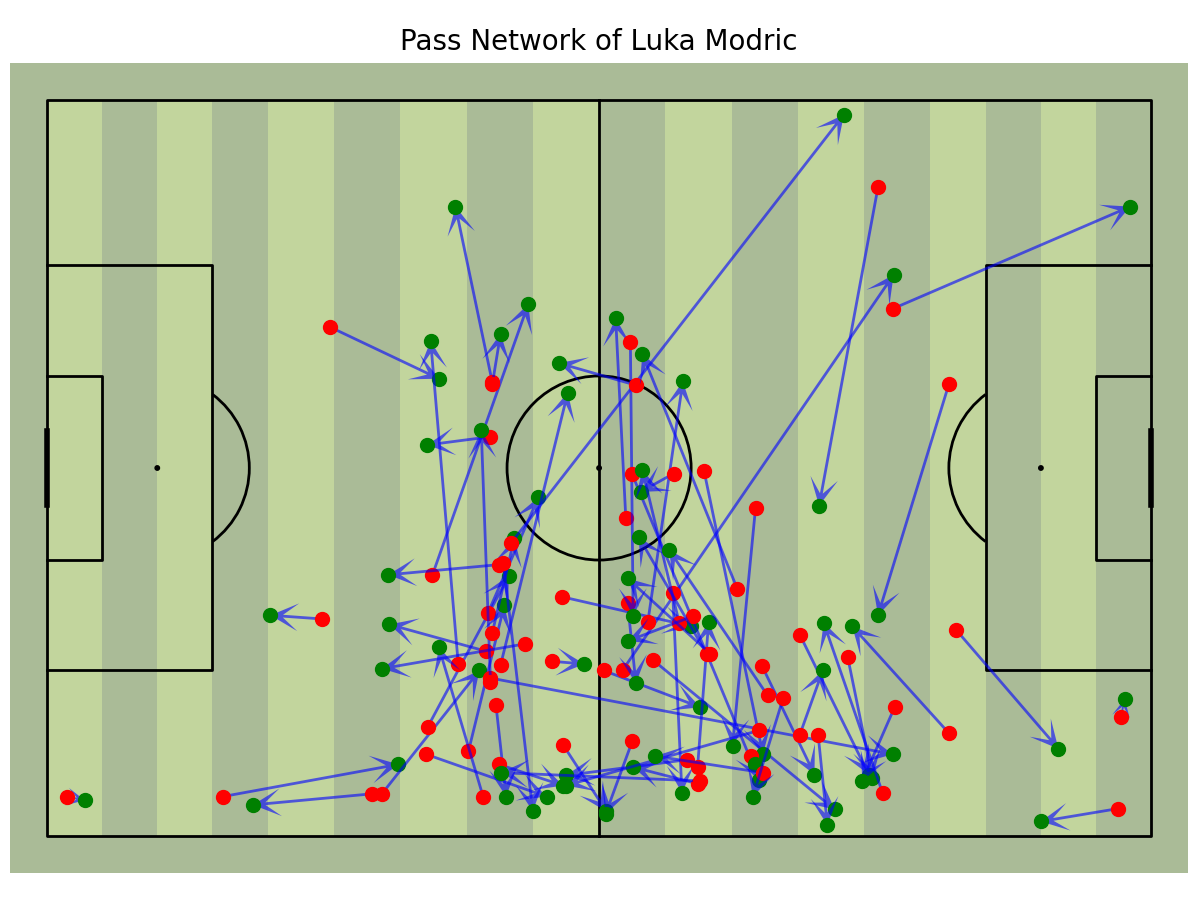

In [23]:
modric_filter = (df['type_name'] == 'Pass') & (df['player_name'] == 'Luka Modrić')
df_passes = df.loc[modric_filter, ['x', 'y', 'end_x', 'end_y']]

# Aggregate the passes to count the number of passes to each recipient
pass_counts = df_passes.groupby(['x', 'y', 'end_x', 'end_y']).size().reset_index(name='count')

# Create the pitch
pitch = Pitch(line_color='black', pitch_color='#aabb97', stripe_color='#c2d59d', stripe=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Plot the passes
for _, row in pass_counts.iterrows():
    pitch.arrows(row['x'], row['y'], row['end_x'], row['end_y'], color='blue', ax=ax['pitch'], width=2, headwidth=10, headlength=10, alpha=0.6)
    pitch.scatter(row['x'], row['y'], alpha=1, s=100, color='red', ax=ax['pitch'])
    pitch.scatter(row['end_x'], row['end_y'], alpha=1, s=100, color='green', ax=ax['pitch'])

# Title for the plot
fig.suptitle("Pass Network of Luka Modric", fontsize=20)

# Show the plot
plt.show()

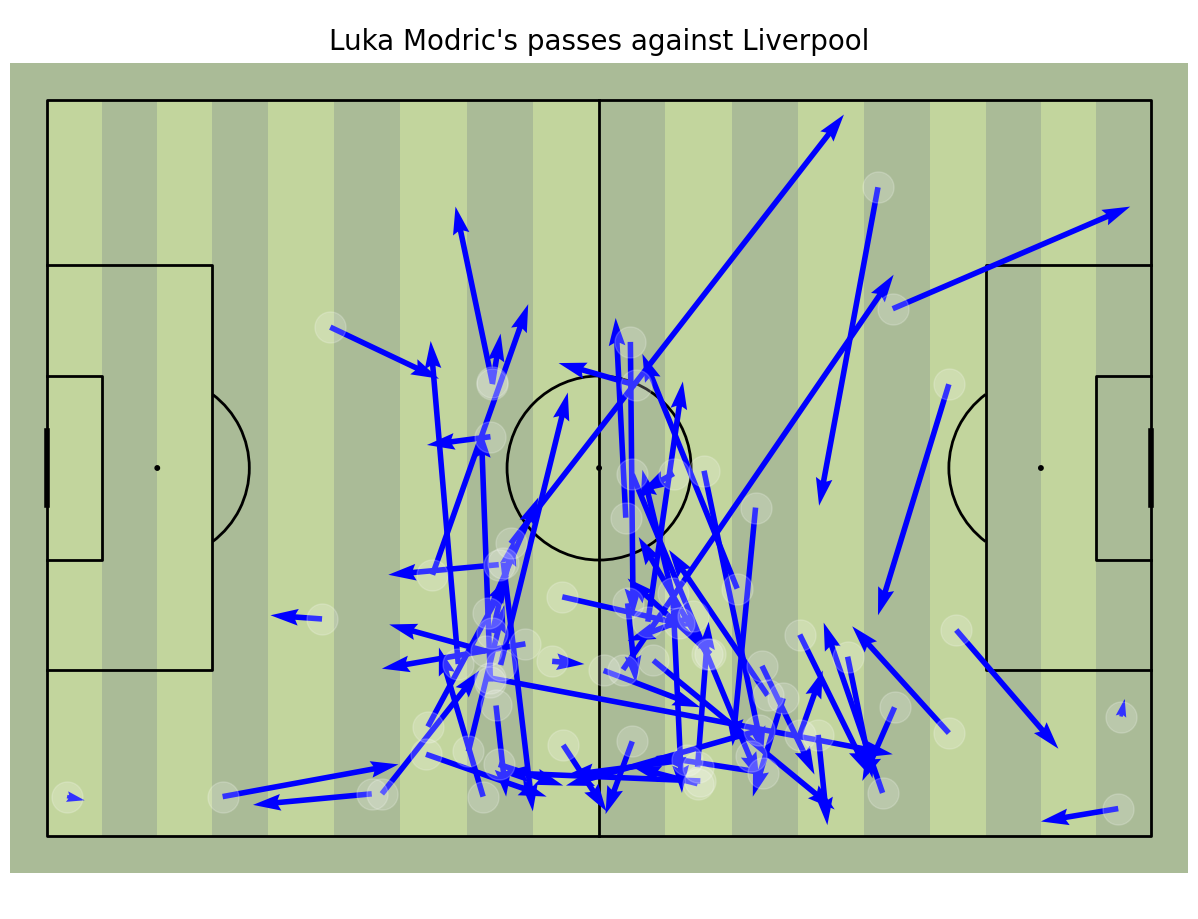

In [26]:
modric_filter = (df['type_name'] == 'Pass') & (df['player_name'] == 'Luka Modrić')
df_pass_modric = df.loc[modric_filter, ['x', 'y', 'end_x', 'end_y']]

# Set up the pitch
pitch = Pitch(line_color='black', pitch_color='#aabb97', stripe_color='#c2d59d', stripe=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Plot the passes
pitch.arrows(df_pass_modric['x'], df_pass_modric['y'],
             df_pass_modric['end_x'], df_pass_modric['end_y'], color='blue', ax=ax['pitch'])
pitch.scatter(df_pass_modric['x'], df_pass_modric['y'], alpha=0.2, s=500, color='white', ax=ax['pitch'])

# Set the title
fig.suptitle("Luka Modric's passes against Liverpool", fontsize=20)

# Show the plot
plt.show()

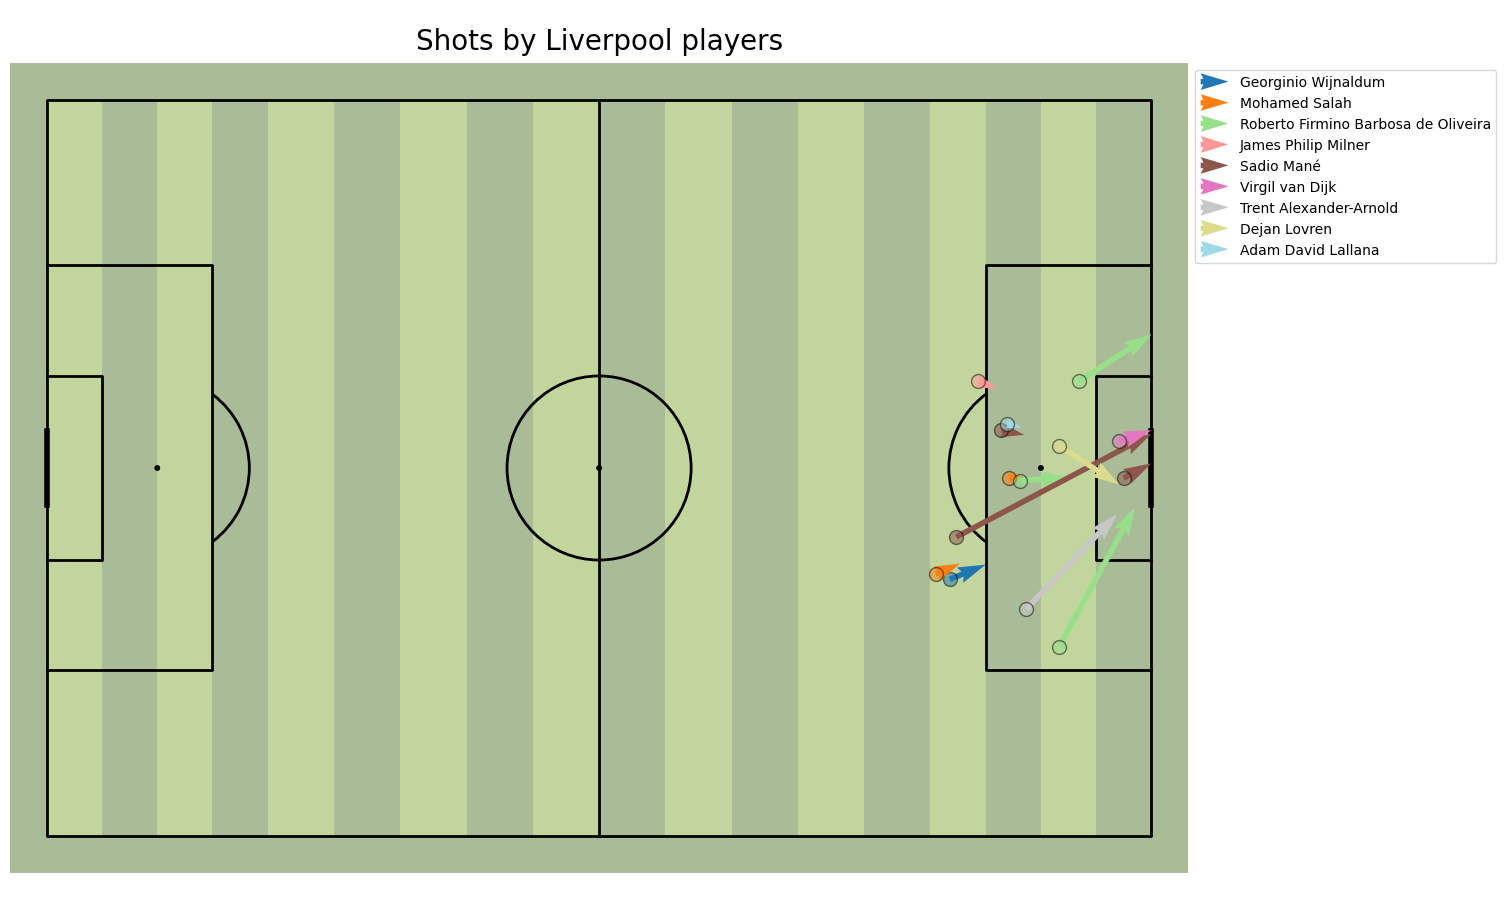

In [39]:
real_madrid_filter = (df['type_name'] == 'Shot') & (df['team_name'] == 'Liverpool')
df_shots = df.loc[real_madrid_filter, ['player_name', 'x', 'y', 'end_x', 'end_y']]

# Create the pitch
pitch = Pitch(line_color='black', pitch_color='#aabb97', stripe_color='#c2d59d', stripe=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Plot arrows for the shots by different players with different colors
players = df_shots['player_name'].unique()
colors = plt.get_cmap('tab20', len(players))

for i, player in enumerate(players):
    player_shots = df_shots[df_shots['player_name'] == player]
    color = colors(i / len(players))  # Get the color from the colormap
    pitch.arrows(player_shots.x, player_shots.y,
                 player_shots.end_x, player_shots.end_y, color=color, ax=ax['pitch'], label=player)
    pitch.scatter(player_shots.x, player_shots.y, alpha=0.5, s=100, color=color, edgecolors="black", ax=ax['pitch'])

# Add legend
ax['pitch'].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Title for the plot
fig.suptitle("Shots by Liverpool players", fontsize=20)

# Show the plot
plt.show()

In [53]:
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Marcelo Vieira da Silva Júnior', 'Marcelo') 
                                            if x == 'Marcelo Vieira da Silva Júnior' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Francisco Román Alarcón Suárez', 'Isco') 
                                            if x == 'Francisco Román Alarcón Suárez' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Daniel Carvajal Ramos', 'Carvajal') 
                                            if x == 'Daniel Carvajal Ramos' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Carlos Henrique Casimiro', 'Casemiro') 
                                            if x == 'Carlos Henrique Casimiro' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Cristiano Ronaldo dos Santos Aveiro', 'Ronaldo') 
                                            if x == 'Cristiano Ronaldo dos Santos Aveiro' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Marco Asensio Willemsen', 'Asensio') 
                                            if x == 'Marco Asensio Willemsen' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Álvaro Borja Morata Martín', 'Morata') 
                                            if x == 'Álvaro Borja Morata Martín' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Keylor Navas Gamboa', 'Keylor Navas') 
                                            if x == 'Keylor Navas Gamboa' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Sergio Ramos García', 'Sergio Ramos') 
                                            if x == 'Sergio Ramos García' else x)
                                            
df['player_name'] = df['player_name'].apply(lambda x: x.replace('José Ignacio Fernández Iglesias', 'Nacho') 
                                            if x == 'José Ignacio Fernández Iglesias' else x)
# recipient player changes
df['pass_recipient_name'] = df['pass_recipient_name'].apply(lambda x: x.replace('Marcelo Vieira da Silva Júnior', 'Marcelo') 
                                            if x == 'Marcelo Vieira da Silva Júnior' else x)
df['pass_recipient_name'] = df['pass_recipient_name'].apply(lambda x: x.replace('Francisco Román Alarcón Suárez', 'Isco') 
                                            if x == 'Francisco Román Alarcón Suárez' else x)
df['pass_recipient_name'] = df['pass_recipient_name'].apply(lambda x: x.replace('Daniel Carvajal Ramos', 'Carvajal') 
                                            if x == 'Daniel Carvajal Ramos' else x)
df['pass_recipient_name'] = df['pass_recipient_name'].apply(lambda x: x.replace('Carlos Henrique Casimiro', 'Casemiro') 
                                            if x == 'Carlos Henrique Casimiro' else x)
df['pass_recipient_name'] = df['pass_recipient_name'].apply(lambda x: x.replace('Cristiano Ronaldo dos Santos Aveiro', 'Ronaldo') 
                                            if x == 'Cristiano Ronaldo dos Santos Aveiro' else x)
df['pass_recipient_name'] = df['pass_recipient_name'].apply(lambda x: x.replace('Marco Asensio Willemsen', 'Asensio') 
                                            if x == 'Marco Asensio Willemsen' else x)
df['pass_recipient_name'] = df['pass_recipient_name'].apply(lambda x: x.replace('Álvaro Borja Morata Martín', 'Morata') 
                                            if x == 'Álvaro Borja Morata Martín' else x)
df['pass_recipient_name'] = df['pass_recipient_name'].apply(lambda x: x.replace('Keylor Navas Gamboa', 'Keylor Navas') 
                                            if x == 'Keylor Navas Gamboa' else x)
df['pass_recipient_name'] = df['pass_recipient_name'].apply(lambda x: x.replace('Sergio Ramos García', 'Sergio Ramos') 
                                            if x == 'Sergio Ramos García' else x)
df['pass_recipient_name'] = df['pass_recipient_name'].apply(lambda x: x.replace('José Ignacio Fernández Iglesias', 'Nacho') 
                                            if x == 'José Ignacio Fernández Iglesias' else x)                                            

In [54]:
df['player_name'].value_counts()

player_name
Toni Kroos                             263
Marcelo                                256
Luka Modrić                            251
Sergio Ramos                           237
Isco                                   190
Raphaël Varane                         176
Nacho                                  145
Ronaldo                                143
Karim Benzema                          143
Casemiro                               142
Georginio Wijnaldum                    141
Andrew Robertson                       140
Roberto Firmino Barbosa de Oliveira    138
Sadio Mané                             134
Jordan Brian Henderson                 130
James Philip Milner                    123
Trent Alexander-Arnold                 116
Dejan Lovren                           105
Carvajal                                97
Virgil van Dijk                         84
Keylor Navas                            69
Loris Karius                            68
Adam David Lallana                      65

In [78]:
xg_events = df
[['team','minute','type_name','shot_body_part','shot_end_location','shot_statsbomb_xg','shot_technique','shot_type','x','y']]
xg_events = xg_events [xg_events['team_name']=='Real Madrid'].reset_index()
xg_events[xg_events.shot_statsbomb_xg.isna()==False]


,level_0,id,index,period,timestamp,minute,second,possession,duration,match_id,...,pass_miscommunication,shot_one_on_one,block_offensive,shot_redirect,foul_committed_advantage,foul_won_advantage,pass_goal_assist,foul_committed_card_id,foul_committed_card_name,injury_stoppage_in_chain
223,466,660d9d98-46b6-4b5e-9c9a-435d63142c93,467,1,00:10:02.932000,10,2,24,1.301567,18245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,747,3e93f456-9971-4a33-9b10-ee9961410a32,748,1,00:14:55.544000,14,55,30,0.730384,18245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
705,1249,e8c20962-0eef-4066-97ce-dcaad4f70b52,1250,1,00:31:03.863000,31,3,58,0.153189,18245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
752,1307,02f0755f-76cf-4d30-8062-369dc9509bdd,1308,1,00:32:00.432000,32,0,60,0.280194,18245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1086,1727,6cb4171b-90e6-4473-831e-df7a2da29f28,1728,1,00:42:20.400000,42,20,73,0.349588,18245,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1144,1812,93c40040-ab9a-4549-8f0e-46c5c1c8e9cd,1813,1,00:44:34.776000,44,34,78,0.549240,18245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1214,1913,6f994944-70fc-4a30-acca-315e3fede0bb,1914,1,00:47:22.409000,47,22,84,1.115222,18245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1284,2024,142e18c8-316a-4f9f-a0f8-3c41549ad1c3,2025,2,00:02:21.236000,47,21,91,0.957859,18245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1336,2109,7654fe57-734f-45d8-bc83-ab940cd37c45,2110,2,00:05:11.158000,50,11,96,2.558185,18245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1568,2423,804f8c8e-d714-4e6a-9cd1-599665efb8c8,2424,2,00:14:59.984000,59,59,109,0.547615,18245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
rm_xg = xg_events[['minute','type_name','shot_statsbomb_xg','x','y']]
rm_xg[rm_xg.shot_statsbomb_xg.isna()==False]

,minute,type_name,shot_statsbomb_xg,x,y
223,10,Shot,0.023376,94.5,26.9
401,14,Shot,0.012569,111.7,58.7
705,31,Shot,0.034284,107.1,53.2
752,32,Shot,0.095949,108.8,32.4
1086,42,Shot,0.171412,112.7,39.9
1144,44,Shot,0.048764,110.3,54.4
1214,47,Shot,0.021335,93.6,27.5
1284,47,Shot,0.123956,105.9,35.6
1336,50,Shot,0.622400,103.7,46.4
1568,59,Shot,0.105558,111.3,44.6


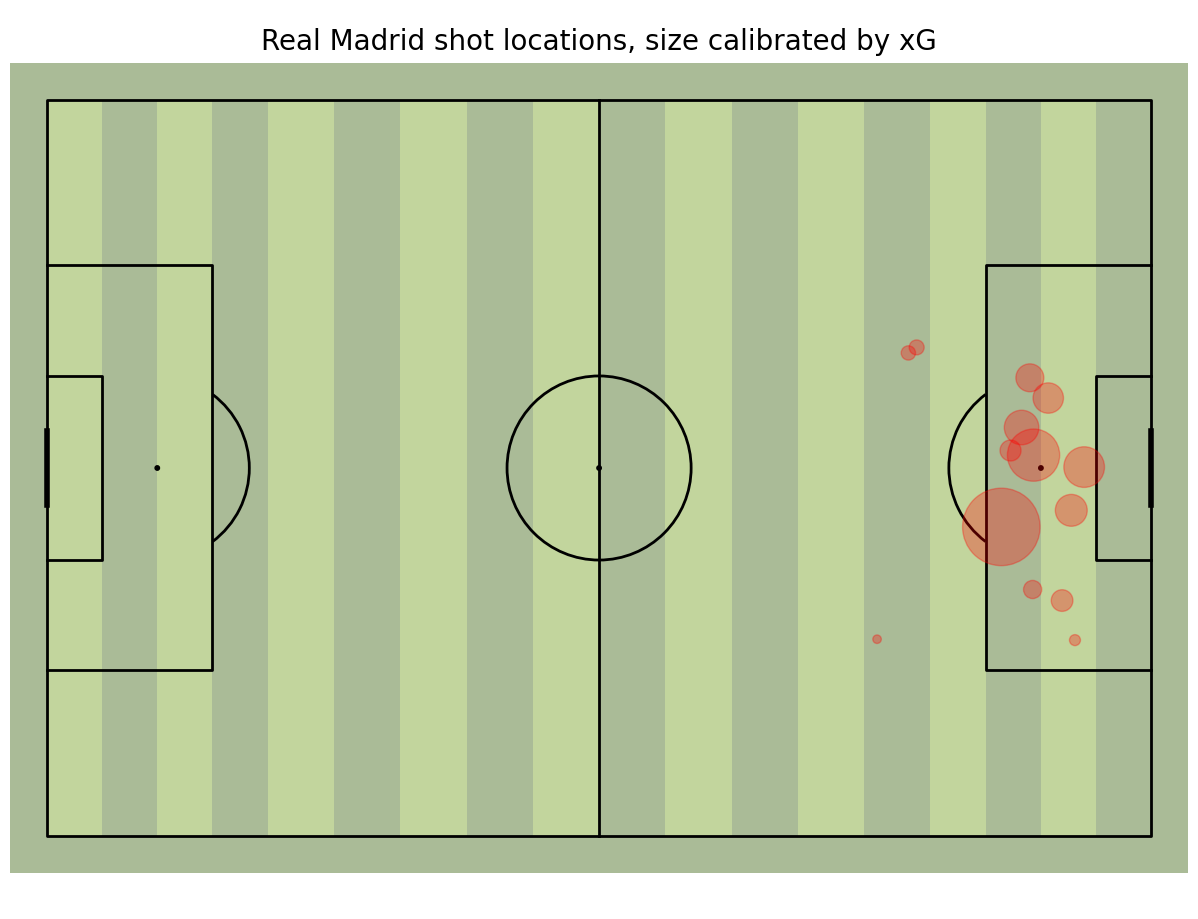

In [81]:
rm_shots =rm_xg[rm_xg.type_name=='Shot']
pitch = Pitch(line_color='black',pitch_color='#aabb97',stripe_color='#c2d59d',stripe=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
plt.suptitle("Real Madrid shot locations, size calibrated by xG",fontsize=20)
pitch.scatter(rm_shots.x, rm_shots.y, alpha = 0.3, s = rm_shots.shot_statsbomb_xg*5000, color = "red", ax=ax['pitch'],)

In [82]:
xg_events = df
[['team','minute','type_name','shot_body_part','shot_end_location','shot_statsbomb_xg','shot_technique','shot_type','x','y']]
xg_events = xg_events [xg_events['team_name']=='Liverpool'].reset_index()
xg_events[xg_events.shot_statsbomb_xg.isna()==False]


,level_0,id,index,period,timestamp,minute,second,possession,duration,match_id,...,pass_miscommunication,shot_one_on_one,block_offensive,shot_redirect,foul_committed_advantage,foul_won_advantage,pass_goal_assist,foul_committed_card_id,foul_committed_card_name,injury_stoppage_in_chain
66,152,682270cc-4bc4-4952-8f91-d3c5a704a691,153,1,00:02:33.865000,2,33,7,0.134619,18245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,244,9f5aa3eb-3bed-4bc0-97a5-bb8444b235b9,245,1,00:05:14.065000,5,14,13,0.092997,18245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,397,399ac143-5f7b-4080-8c0b-3c18435d7fc1,398,1,00:07:56.816000,7,56,19,1.006248,18245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,627,fe6c7f60-2ff0-4077-882e-b045c8abc7c3,628,1,00:13:02.999000,13,2,28,0.054247,18245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,637,eda7e108-2479-46f2-9cd0-a0bc2939e352,638,1,00:13:06.982000,13,6,28,0.131287,18245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,643,c36dfe04-2f8e-48f0-8df6-1c4d0b93a16e,644,1,00:13:08.631000,13,8,28,0.160234,18245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,872,9def9ed2-52f0-496b-8ae8-f4c5a97c2d8a,873,1,00:17:53.189000,17,53,35,0.973667,18245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464,1077,20b934f1-9afa-401d-9a16-f97fea2b80d9,1078,1,00:22:35.709000,22,35,45,0.113189,18245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467,1082,6711367a-6855-4914-903e-a5e19771429c,1083,1,00:22:38.035000,22,38,45,0.383183,18245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811,2172,30a872eb-fe88-4c46-858b-a4f487cb69e4,2173,2,00:09:29.030000,54,29,102,0.774955,18245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
lp_xg = xg_events [['minute','type_name','shot_statsbomb_xg','x','y']]
lp_xg[lp_xg.shot_statsbomb_xg.isna()==False]

,minute,type_name,shot_statsbomb_xg,x,y
66,2,Shot,0.036399,98.1,52.1
130,5,Shot,0.027976,96.6,51.5
217,7,Shot,0.075361,112.1,30.6
274,13,Shot,0.043772,101.2,30.6
280,13,Shot,0.065653,104.5,41.1
283,13,Shot,0.057769,103.7,35.9
385,17,Shot,0.248677,116.5,37.1
464,22,Shot,0.083349,105.7,41.4
467,22,Shot,0.037277,106.4,55.3
811,54,Shot,0.049275,110.0,37.6


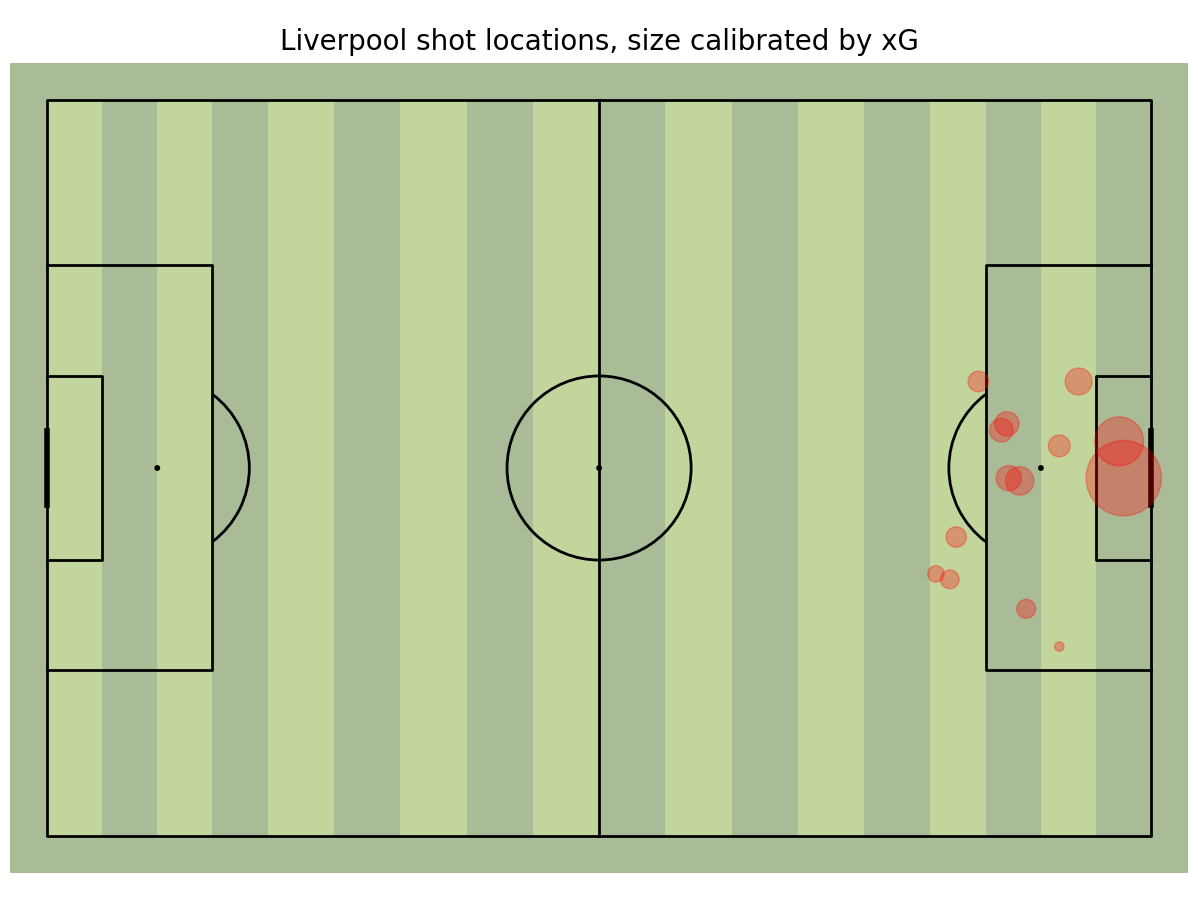

In [85]:
lp_shots =lp_xg[lp_xg.type_name=='Shot']
pitch = Pitch(line_color='black',pitch_color='#aabb97',stripe_color='#c2d59d',stripe=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
plt.suptitle("Liverpool shot locations, size calibrated by xG",fontsize=20)
pitch.scatter(lp_shots.x, lp_shots.y, alpha = 0.3, s = lp_shots.shot_statsbomb_xg*5000, color = "red", ax=ax['pitch'],)

In [ ]:
madrid_passes = df[(df['type_name'] == 'Pass') & (df['team_name'] == 'Real Madrid')]

# Initialize the pitch
pitch = Pitch(line_color='black', pitch_color='#aabb97', stripe_color='#c2d59d', stripe=True)

# Create a figure with subplots for each player
players = madrid_passes['player_name'].unique()
num_players = len(players)
fig, axes = plt.subplots(int(num_players / 2) + num_players % 2, 2, figsize=(12, 8))
axes = axes.flatten()

# Plot KDE heatmap for each player
for i, player in enumerate(players):
    player_passes = madrid_passes[madrid_passes['player_name'] == player]
    ax = axes[i]
    pitch.draw(ax=ax)
    
    # KDE plot
    sns.kdeplot(
        x=player_df['x'],
        y=player_df['y'],
        fill=True,
        cmap='Reds',  # Adjust colormap as needed
        thresh=0.1,  # Adjust threshold for density
        levels=100,  # Adjust number of contour levels
        ax=ax
    )
    sns.kdeplot(
        x=player_passes['x'], 
        y=player_passes['y'], 
        fill=True, 
        color='blue', 
        ax=ax, 
        levels=100, 
        alpha=0.6
    )
    
    ax.set_title(player)
    

# Hide any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Set a main title
fig.suptitle("Real Madrid Players' Pass Heatmaps", fontsize=20)

plt.tight_layout()
plt.show()


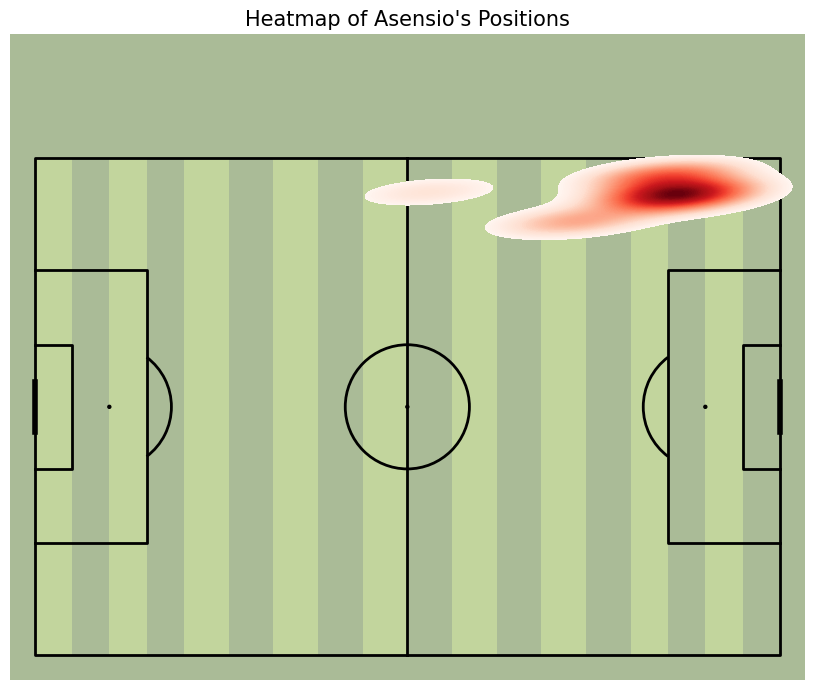

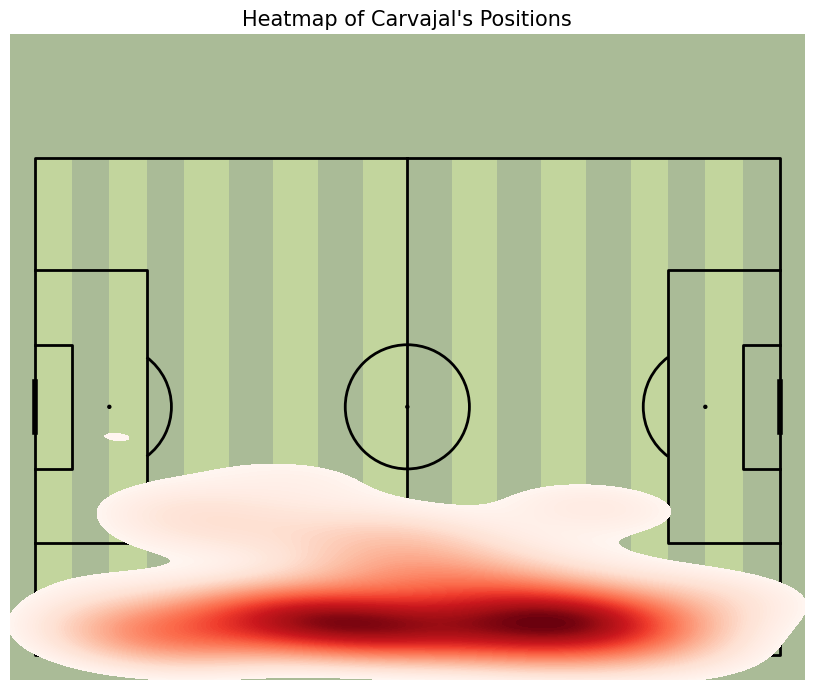

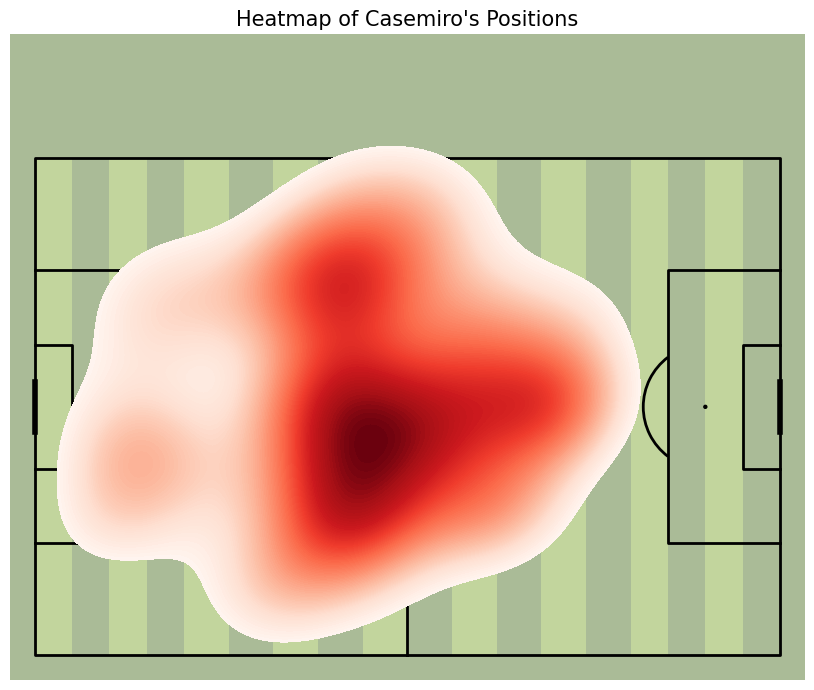

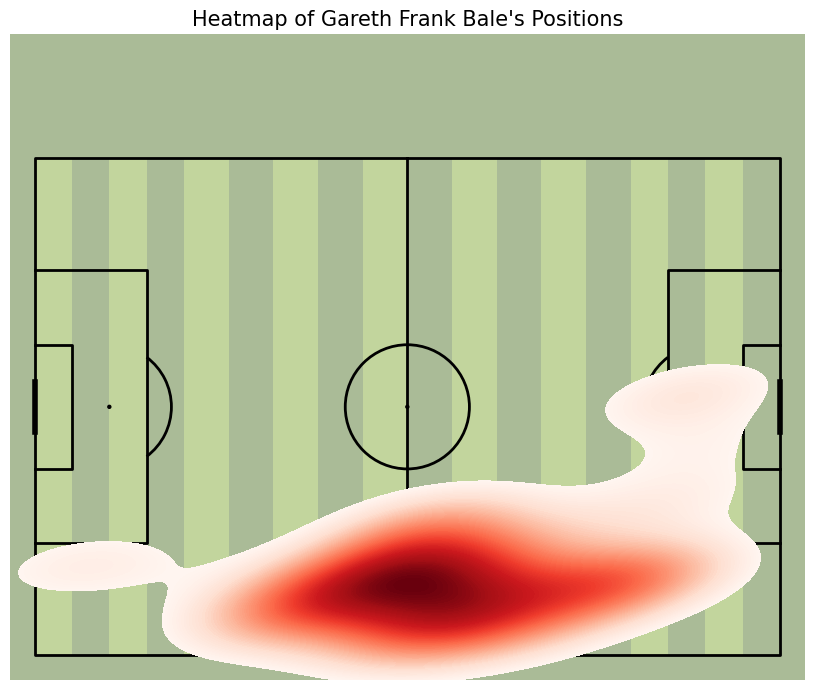

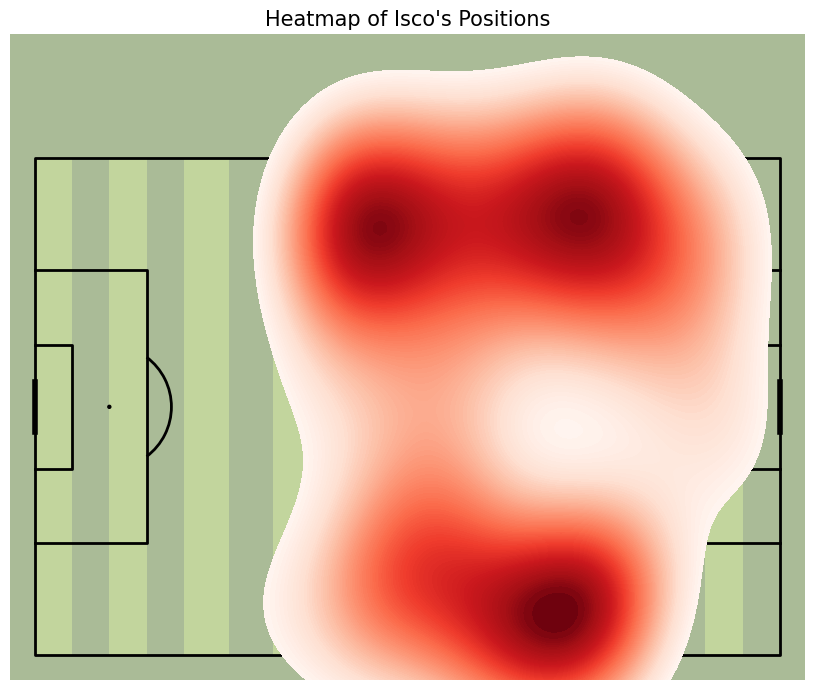

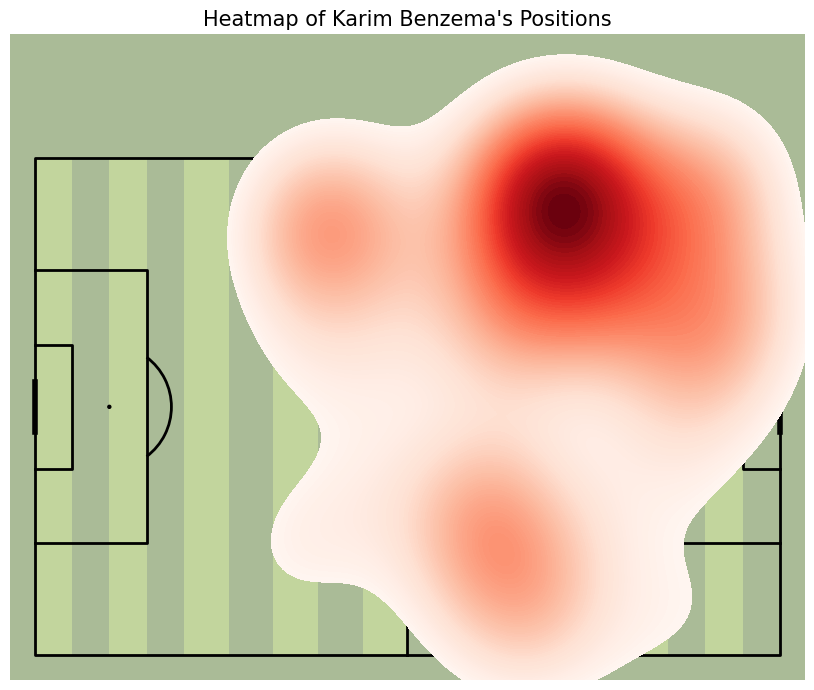

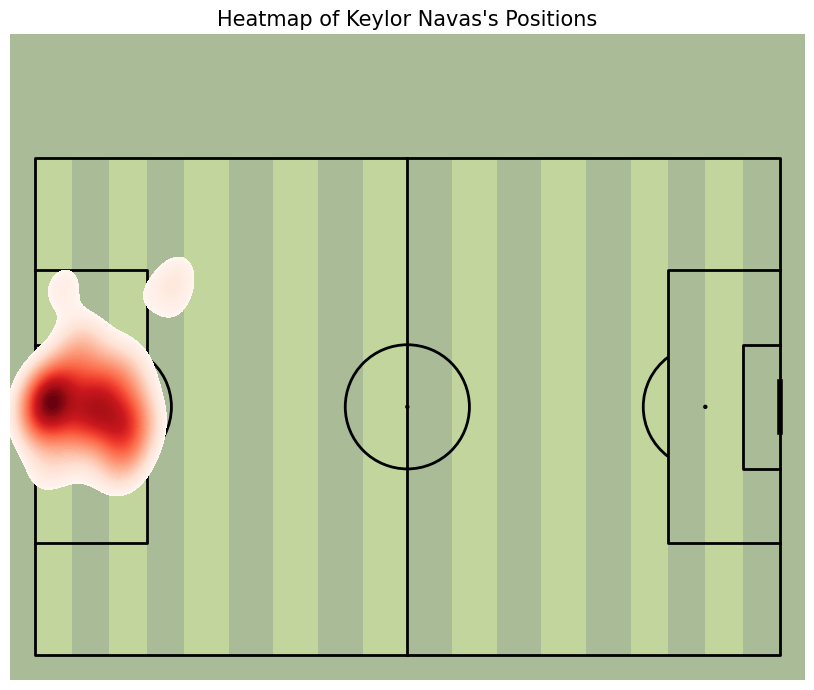

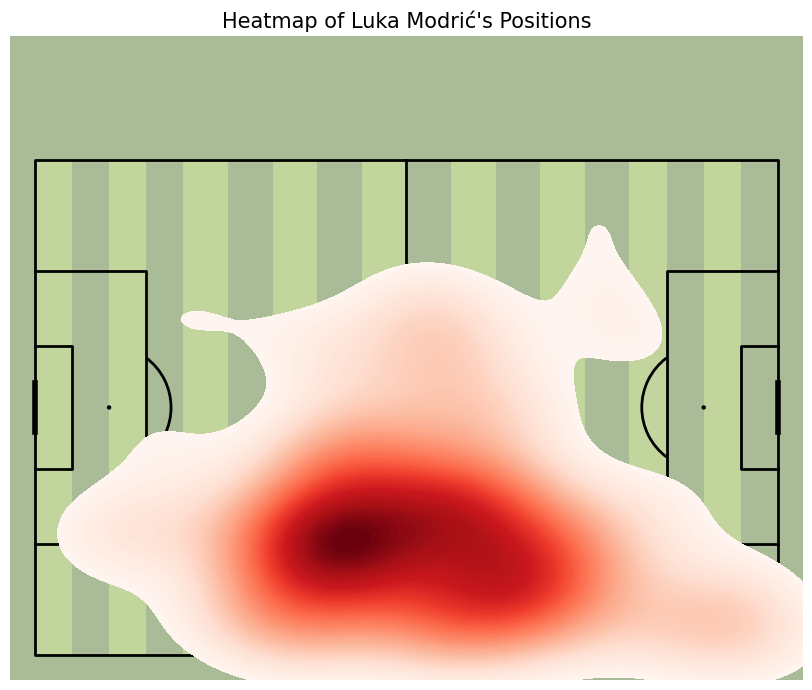

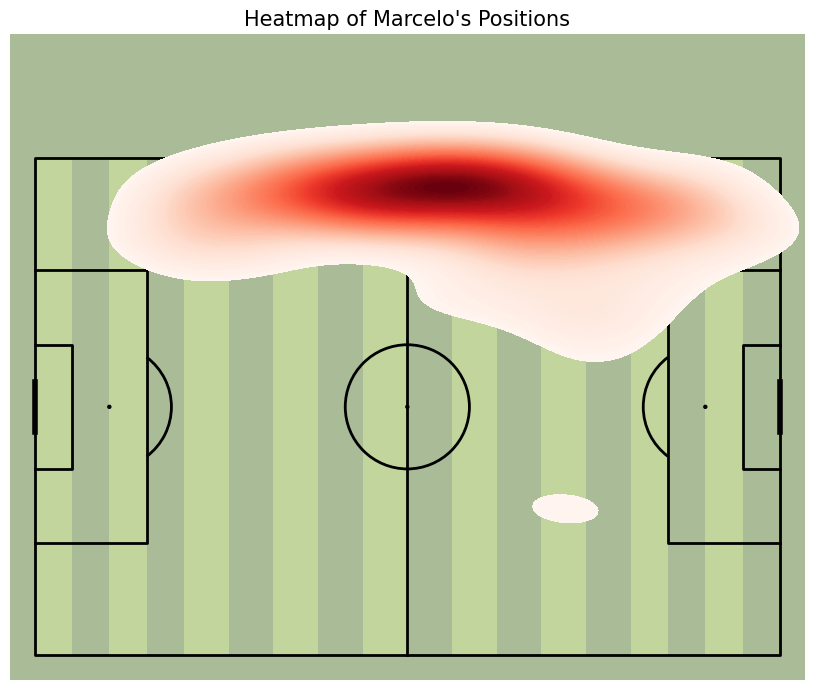

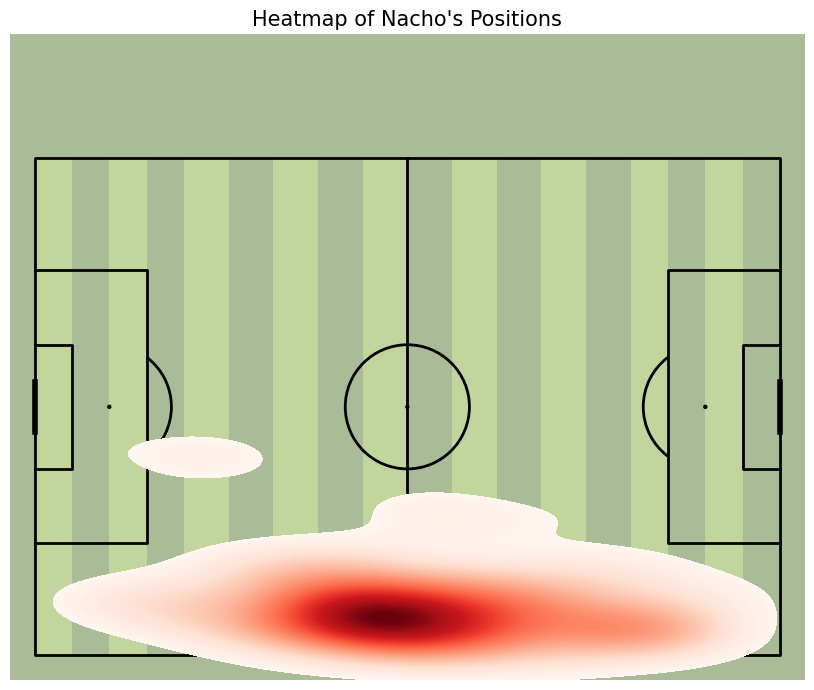

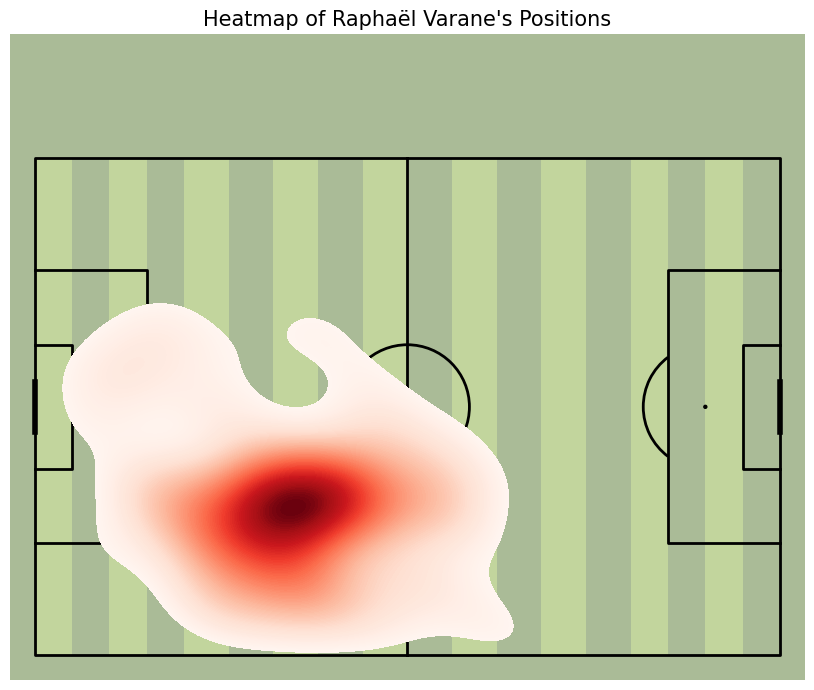

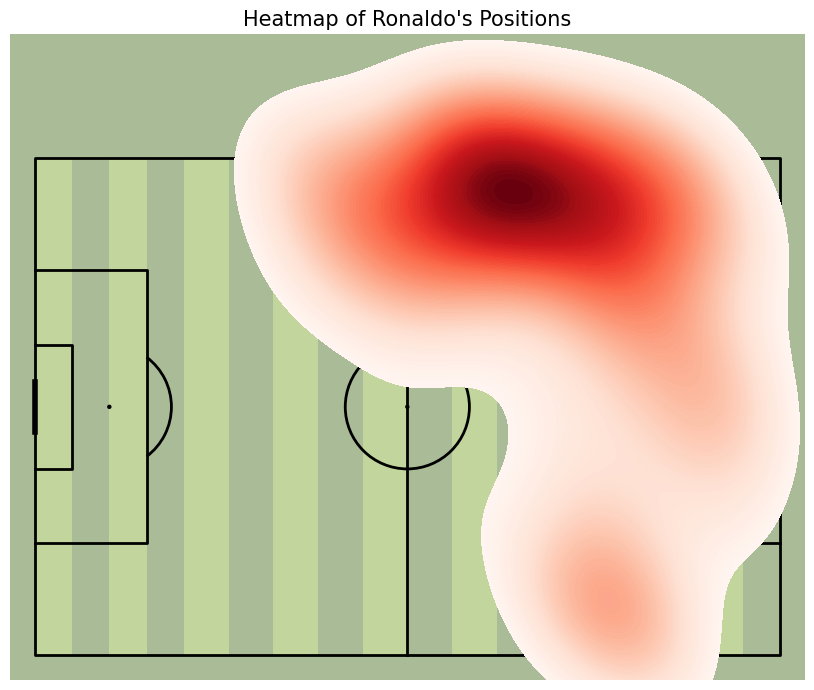

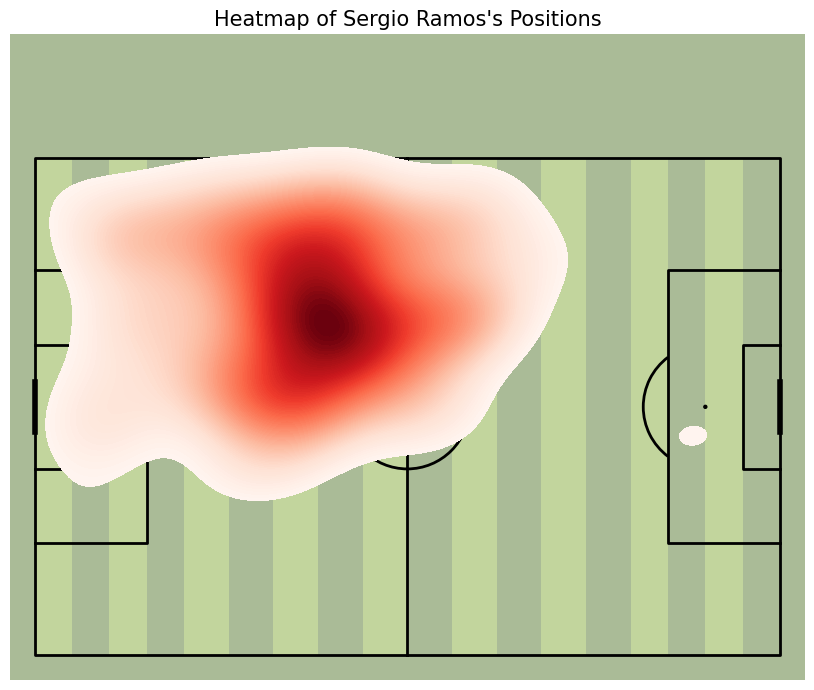

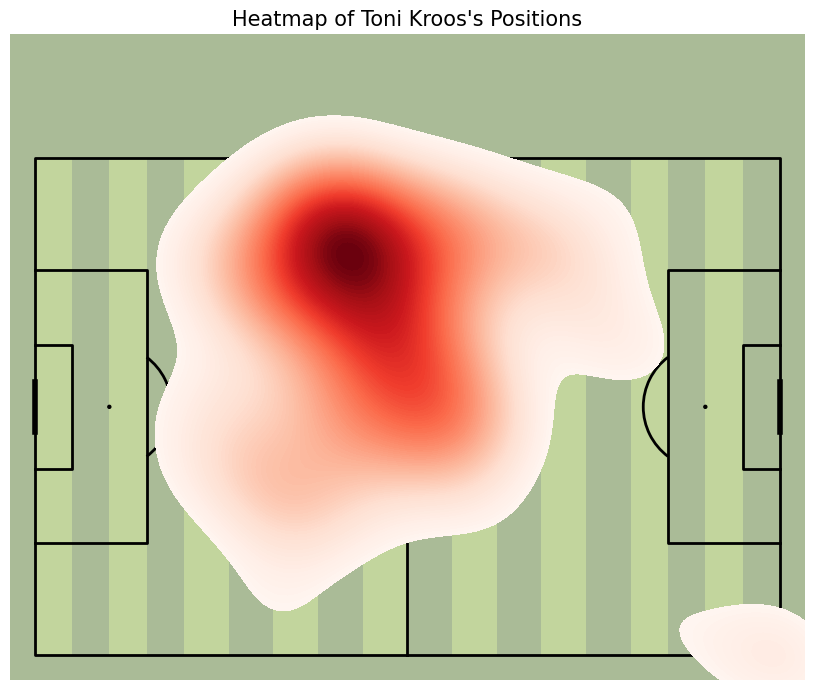

In [56]:
madrid_players = df[df['team_name'] == 'Real Madrid']

# Aggregate average positions of players
player_positions = madrid_players.groupby('player_name').agg({'x': 'mean', 'y': 'mean'}).reset_index()

# Initialize the pitch settings
pitch = Pitch(line_color='black', pitch_color='#aabb97', stripe_color='#c2d59d', stripe=True, pad_top=20)

# Loop over each player to create individual plots
for _, player in player_positions.iterrows():
    player_name = player['player_name']
    player_df = madrid_players[madrid_players['player_name'] == player_name]

    # Create a new figure and axis for each player
    fig, ax = pitch.draw(figsize=(10, 7))

    # Plot heatmap of player positions
    sns.kdeplot(
        x=player_df['x'],
        y=player_df['y'],
        fill=True,
        cmap='Reds',  # Adjust colormap as needed
        thresh=0.1,  # Adjust threshold for density
        levels=100,  # Adjust number of contour levels
        ax=ax
    )

    # Add player name as title
    ax.set_title(f"Heatmap of {player_name}'s Positions", fontsize=15)

    # Show the plot
    plt.show()

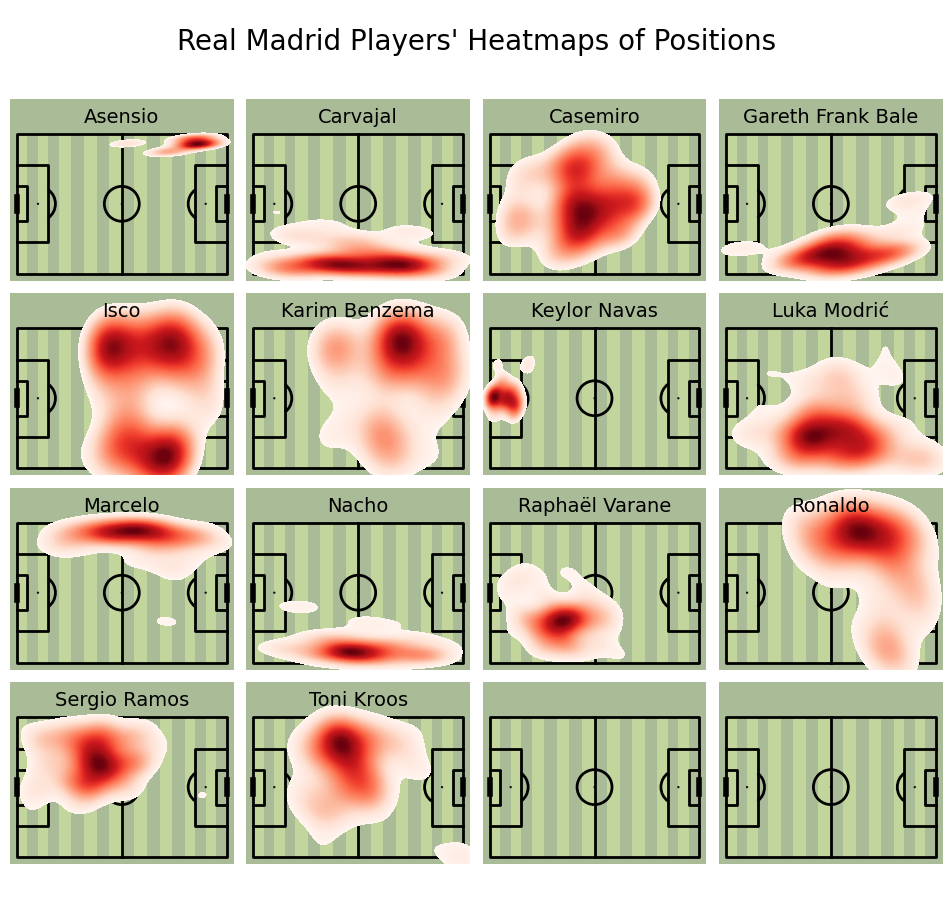

<Figure size 1400x1000 with 0 Axes>

In [58]:
madrid_players = df[df['team_name'] == 'Real Madrid']

# Aggregate average positions of players
player_positions = madrid_players.groupby('player_name').agg({'x': 'mean', 'y': 'mean'}).reset_index()

# Initialize the pitch settings
pitch = Pitch(line_color='black', pitch_color='#aabb97', stripe_color='#c2d59d', stripe=True, pad_top=20)

# Create a figure with subplots for each player
fig, axs = pitch.grid(ncols=4, nrows=4, grid_height=0.85, title_height=0.06, axis=False,
                      endnote_height=0.04, title_space=0.04, endnote_space=0.01)
plt.figure(figsize=(14, 10))

# Loop over each player to create individual plots
for i, player in enumerate(player_positions['player_name']):
    player_df = madrid_players[madrid_players['player_name'] == player]

    # Select subplot for current player
    ax = axs['pitch'].flat[i]

    # Plot heatmap of player positions
    sns.kdeplot(
        x=player_df['x'],
        y=player_df['y'],
        fill=True,
        cmap='Reds',  # Adjust colormap as needed
        thresh=0.1,  # Adjust threshold for density
        levels=100,  # Adjust number of contour levels
        ax=ax
    )
    

    # Add player name as title
    #ax.set_title(f" {player}", fontsize=12)
    ax.text(60, -10, player,ha='center', va='center', fontsize=14)

# Remove any extra subplots if necessary
for j in range(len(player_positions), len(axs['pitch'])):
    axs['pitch'].flat[j].axis('off')

# Set overall title
fig.suptitle("Real Madrid Players' Heatmaps of Positions", fontsize=20)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

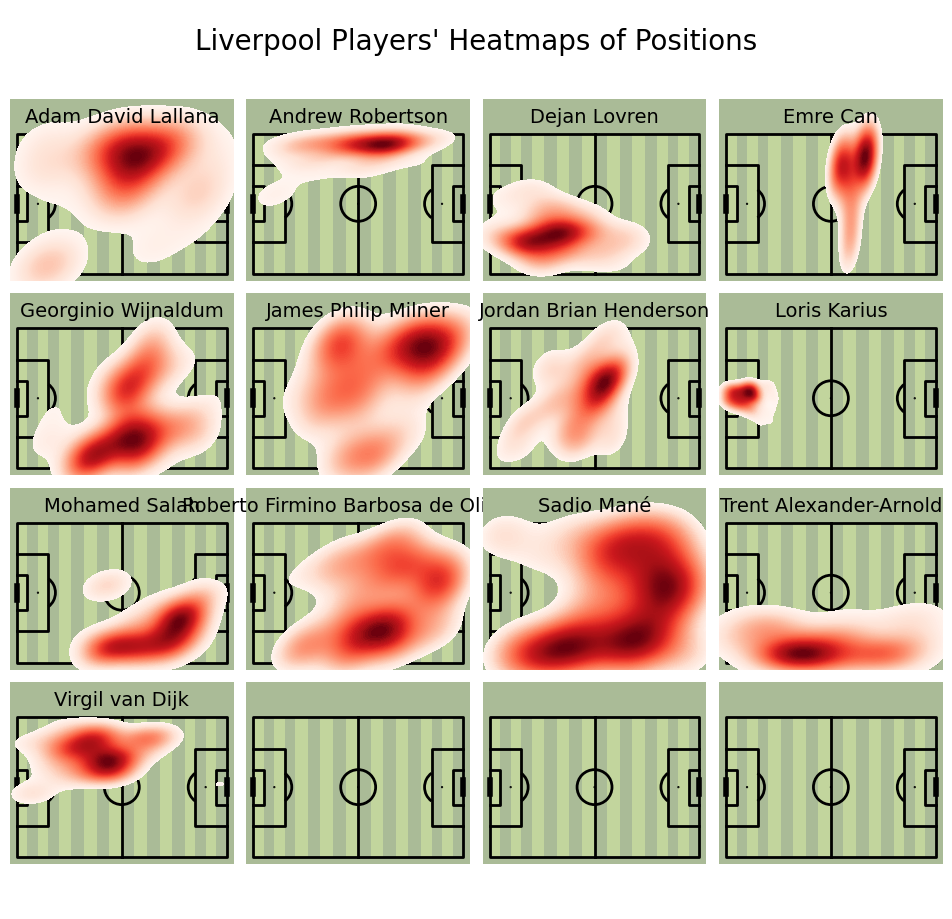

<Figure size 1400x1000 with 0 Axes>

In [87]:
liverpool_players = df[df['team_name'] == 'Liverpool']

# Aggregate average positions of players
player_positions = liverpool_players.groupby('player_name').agg({'x': 'mean', 'y': 'mean'}).reset_index()

# Initialize the pitch settings
pitch = Pitch(line_color='black', pitch_color='#aabb97', stripe_color='#c2d59d', stripe=True, pad_top=20)

# Create a figure with subplots for each player
fig, axs = pitch.grid(ncols=4, nrows=4, grid_height=0.85, title_height=0.06, axis=False,
                      endnote_height=0.04, title_space=0.04, endnote_space=0.01)
plt.figure(figsize=(14, 10))

# Loop over each player to create individual plots
for i, player in enumerate(player_positions['player_name']):
    player_df = liverpool_players[liverpool_players['player_name'] == player]

    # Select subplot for current player
    ax = axs['pitch'].flat[i]

    # Plot heatmap of player positions
    sns.kdeplot(
        x=player_df['x'],
        y=player_df['y'],
        fill=True,
        cmap='Reds',  # Adjust colormap as needed
        thresh=0.1,  # Adjust threshold for density
        levels=100,  # Adjust number of contour levels
        ax=ax
    )
    

    # Add player name as title
    #ax.set_title(f" {player}", fontsize=12)
    ax.text(60, -10, player,ha='center', va='center', fontsize=14)

# Remove any extra subplots if necessary
for j in range(len(player_positions), len(axs['pitch'])):
    axs['pitch'].flat[j].axis('off')

# Set overall title
fig.suptitle("Liverpool Players' Heatmaps of Positions", fontsize=20)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [72]:
sub = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == "Real Madrid"].iloc[0]["index"]
#make df with successfull passes by Real Madrid until the first substitution
rm_passes = (df.type_name == 'Pass') & (df.team_name == "Real Madrid") & (df.index < sub) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")
#taking necessary columns
rm_pass = df.loc[rm_passes, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
#adjusting that only the surname of a player is presented.
rm_pass["player_name"] = rm_pass["player_name"].apply(lambda x: str(x).split()[-1])
rm_pass["pass_recipient_name"] = rm_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1])

scatter_df = pd.DataFrame()
for i, name in enumerate(rm_pass["player_name"].unique()):
    passx = rm_pass.loc[rm_pass["player_name"] == name]["x"].to_numpy()
    recx = rm_pass.loc[rm_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy = rm_pass.loc[rm_pass["player_name"] == name]["y"].to_numpy()
    recy = rm_pass.loc[rm_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_df.at[i, "player_name"] = name
    #make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    #calculate number of passes
    scatter_df.at[i, "no"] = rm_pass.loc[rm_pass["player_name"] == name].count().iloc[0]
#adjust the size of a circle so that the player who made more passes 
scatter_df['marker_size'] = (scatter_df["no"] / scatter_df["no"].max() * 1500)

rm_pass["pair_key"] = rm_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_df = rm_pass.groupby(["pair_key"]).x.count().reset_index()
lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
#setting a threshold. You can try to investigate how it changes when you change it.
lines_df = lines_df[lines_df['pass_count']>2]




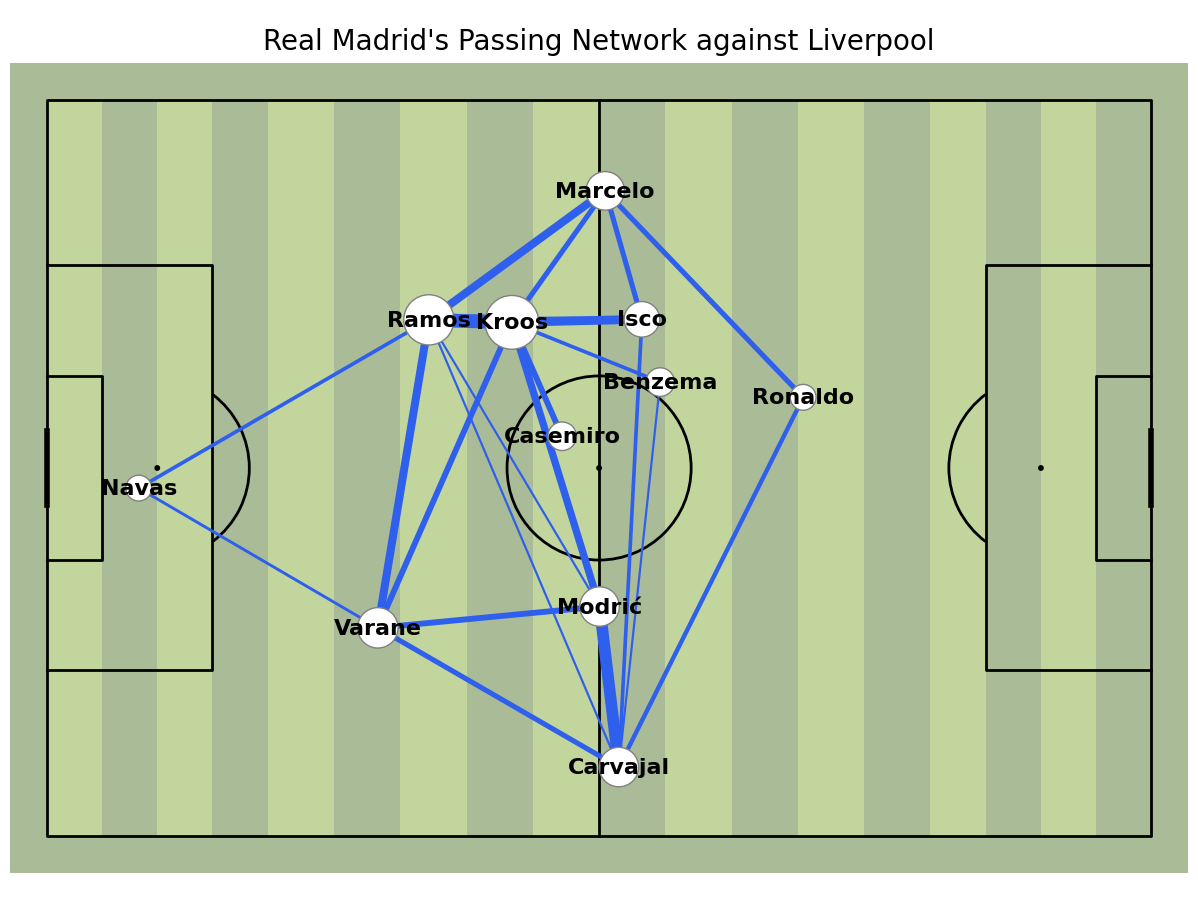

In [75]:
pitch = Pitch(line_color='black',pitch_color='#aabb97',stripe_color='#c2d59d',stripe=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='#FFFF', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)
for i, row in lines_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #take the average location of players to plot a line between them 
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that the more passes, the wider the line
        line_width = (num_passes / lines_df['pass_count'].max() * 10)
        #plot lines on the pitch
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                        alpha=1, lw=line_width, zorder=2, color="#2f5fed", ax = ax["pitch"])
fig.suptitle("Real Madrid's Passing Network against Liverpool", fontsize = 20)
plt.show()

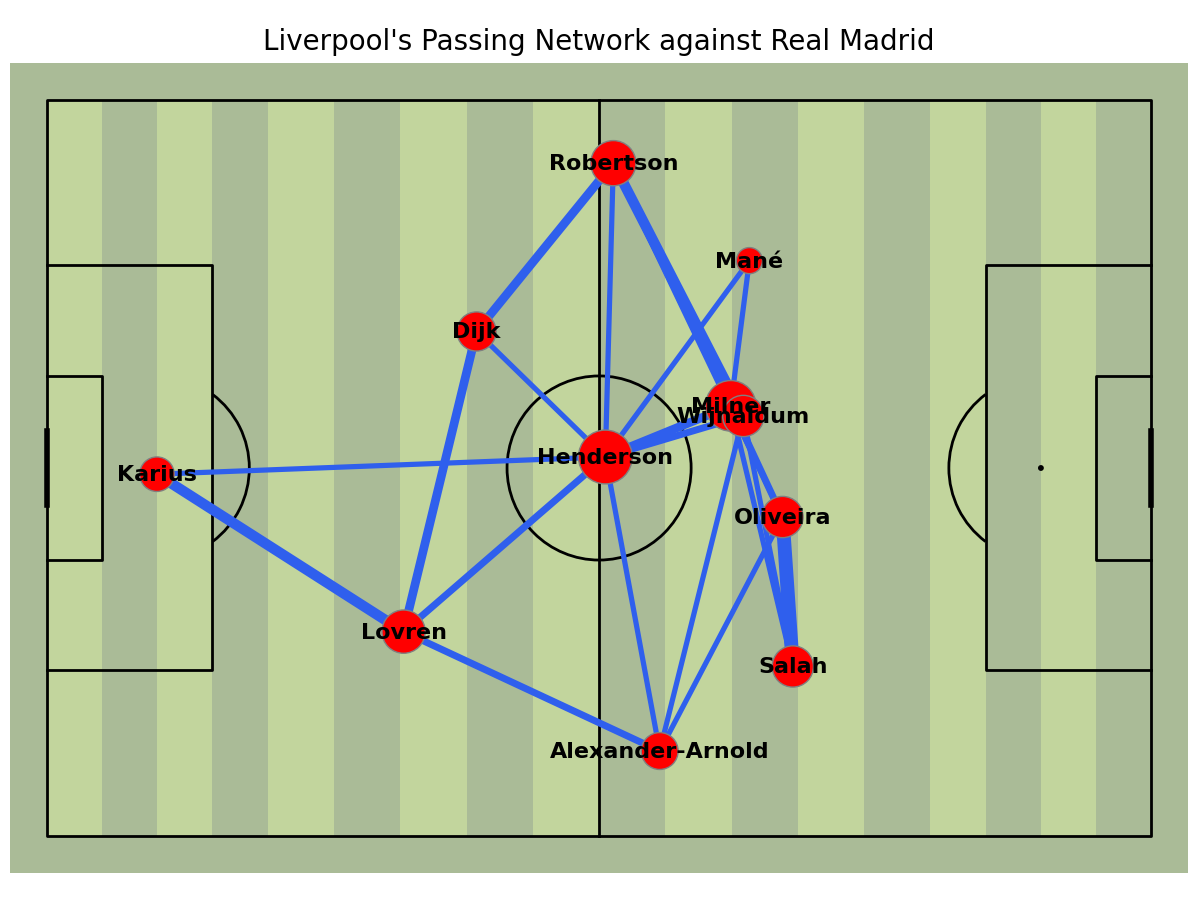

In [71]:
sub = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == "Liverpool"].iloc[0]["index"]

# Filter successful passes by Liverpool until the first substitution
liverpool_passes = (df.type_name == 'Pass') & (df.team_name == "Liverpool") & (df.index < sub) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")
liverpool_pass = df.loc[liverpool_passes, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]

# Adjusting that only the surname of a player is presented
liverpool_pass["player_name"] = liverpool_pass["player_name"].apply(lambda x: str(x).split()[-1])
liverpool_pass["pass_recipient_name"] = liverpool_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1])

# Prepare scatter_df for visualization
scatter_df = pd.DataFrame()
for i, name in enumerate(liverpool_pass["player_name"].unique()):
    passx = liverpool_pass.loc[liverpool_pass["player_name"] == name]["x"].to_numpy()
    recx = liverpool_pass.loc[liverpool_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy = liverpool_pass.loc[liverpool_pass["player_name"] == name]["y"].to_numpy()
    recy = liverpool_pass.loc[liverpool_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
    
    scatter_df.at[i, "player_name"] = name
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    scatter_df.at[i, "no"] = liverpool_pass.loc[liverpool_pass["player_name"] == name].count().iloc[0]

# Adjust the size of circles based on the number of passes
scatter_df['marker_size'] = (scatter_df["no"] / scatter_df["no"].max() * 1500)

# Calculate passing pairs and count passes between them
liverpool_pass["pair_key"] = liverpool_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_df = liverpool_pass.groupby(["pair_key"]).x.count().reset_index()
lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
lines_df = lines_df[lines_df['pass_count'] > 2]  # Setting a threshold for visualizing passing lines

# Initialize the pitch configuration
pitch = Pitch(line_color='black', pitch_color='#aabb97', stripe_color='#c2d59d', stripe=True)

# Create the pitch grid
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Plot player positions as scatter points
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder=3)

# Annotate player names
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight="bold", size=16, ax=ax["pitch"], zorder=4)

# Plot passing lines between players
for i, row in lines_df.iterrows():
    player1 = row["pair_key"].split("_")[0]
    player2 = row['pair_key'].split("_")[1]
    
    player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
    player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
    player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
    player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
    
    num_passes = row["pass_count"]
    line_width = (num_passes / lines_df['pass_count'].max() * 10)
    
    pitch.lines(player1_x, player1_y, player2_x, player2_y, alpha=1, lw=line_width, zorder=2, color="#2f5fed", ax=ax["pitch"])

# Set the main title
fig.suptitle("Liverpool's Passing Network against Real Madrid", fontsize=20)

# Display the plot
plt.show()

In [ ]:
xg

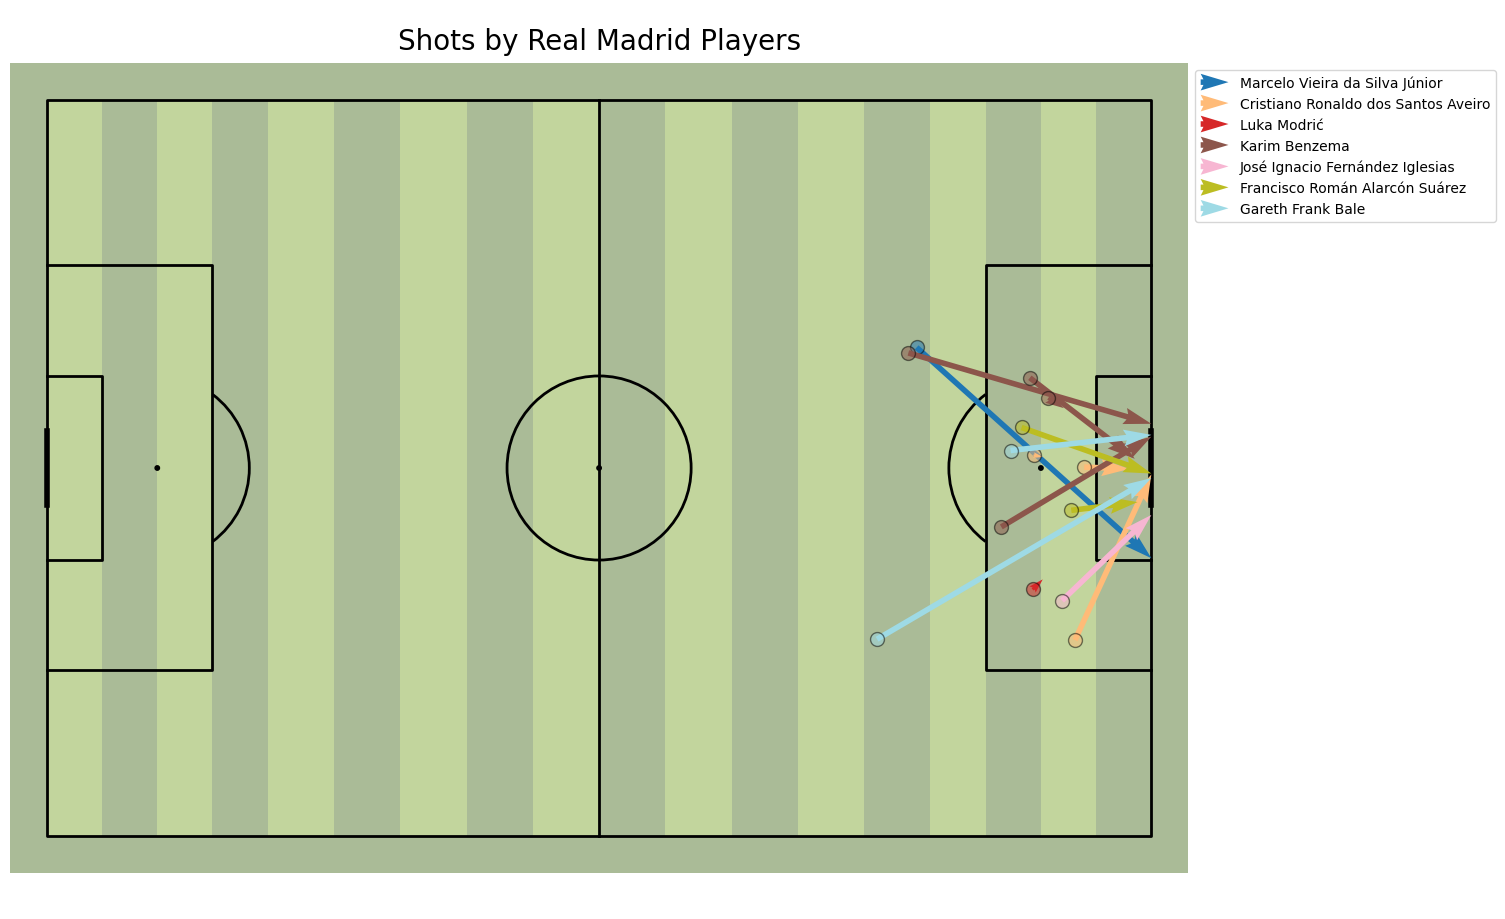

In [20]:
real_madrid_filter = (df['type_name'] == 'Shot') & (df['team_name'] == 'Real Madrid')
df_shots = df.loc[real_madrid_filter, ['player_name', 'x', 'y', 'end_x', 'end_y']]

# Create the pitch
pitch = Pitch(line_color='black', pitch_color='#aabb97', stripe_color='#c2d59d', stripe=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Plot arrows for the shots by different players with different colors
players = df_shots['player_name'].unique()
colors = plt.get_cmap('tab20', len(players))

for i, player in enumerate(players):
    player_shots = df_shots[df_shots['player_name'] == player]
    color = colors(i / len(players))  # Get the color from the colormap
    pitch.arrows(player_shots.x, player_shots.y,
                 player_shots.end_x, player_shots.end_y, color=color, ax=ax['pitch'], label=player)
    pitch.scatter(player_shots.x, player_shots.y, alpha=0.5, s=100, color=color, edgecolors="black", ax=ax['pitch'])

# Add legend
ax['pitch'].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Title for the plot
fig.suptitle("Shots by Real Madrid Players", fontsize=20)

# Show the plot
plt.show()